## <p style="background-color: #f5df18; padding: 10px;"> Foundations of Astronomical Data Science | **Plotting and Tabluar Data** </p>


<div style="display: flex;">
    <div style="flex: 1; margin-right: 20px;">
        <h2>Questions</h2>
        <ul>
            <li>How do we make scatter plots in Matplotlib?</li>
    <li>How do we store data in a Pandas <code>DataFrame</code>?</li>
        </ul>
    </div>
    <div style="flex: 1;">
        <h2>Learning Objectives</h2>
        <ul>
            <li>Select rows and columns from an Astropy <code>Table</code>.</li>
    <li>Use Matplotlib to make a scatter plot.</li>
    <li>Use Gala to transform coordinates.</li>
    <li>Make a Pandas <code>DataFrame</code> and use a Boolean <code>Series</code> to select rows.</li>
    <li>Save a <code>DataFrame</code> in an HDF5 file.</li>
        </ul>
    </div>
</div>

In the previous episode, we wrote a query to select stars from the
region of the sky where we expect GD-1 to be, and saved the results in
a FITS file.

Now we will read that data back in and implement the next step in the
analysis, identifying stars with the proper motion we expect for GD-1.


# Outline
---

1. We will read back the results from the previous lesson, which we
  saved in a FITS file.

2. Then we will transform the coordinates and proper motion data from
  ICRS back to the coordinate frame of GD-1.

3. We will put those results into a Pandas `DataFrame`.

This imports previously imported functions:

In [1]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from gala.coordinates import GD1Koposov10
from astropy.table import Table

from episode_functions import *

The following code loads in the data (instructions for downloading data can be
found in the [setup instructions](https://datacarpentry.org/astronomy-python/instructor/index.html#setup)). You may need to add a the path
to the filename variable below (e.g. `filename = 'student_download/backup-data/gd1_results.fits'`)

In [30]:
filename = '../backup-data/gd1_results.fits'
polygon_results = Table.read(filename)

gd1_frame = GD1Koposov10()

# Selecting rows and columns
---

In the previous episode, we selected spatial and proper motion information from the Gaia catalog for stars around a small part of GD-1. The output was returned as an Astropy `Table`.
We can use `info` to check the contents.

In [2]:
from astropy.table import Table

filename = '../gd1_results.fits'
polygon_results = Table.read(filename)

gd1_frame = GD1Koposov10()

In this episode, we will see operations for selecting columns and rows
from an Astropy `Table`.  You can find more information about these
operations in the [Astropy
documentation](https://docs.astropy.org/en/stable/table/access_table.html).

We can get the names of the columns like this:

In [3]:
polygon_results.colnames

['SOURCE_ID', 'ra', 'dec', 'pmra', 'pmdec', 'parallax']

And select an individual column like this:

In [4]:
polygon_results['ra']

142.48301935991023
142.25452941346344
142.64528557468074
142.57739430926034
142.58913564478618
141.81762228999614
143.18339801317677
142.9347319464589
142.26769745823267
142.89551292869012
142.2780935768316


The result is a `Column` object that contains the data, and also the
data type, units, and name of the column.

In [5]:
type(polygon_results['ra'])

astropy.table.column.Column

The rows in the `Table` are numbered from 0 to `n-1`, where `n` is the
number of rows.  We can select the first row like this:



In [6]:
polygon_results[0]

SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354


The result is a `Row` object.


In [7]:
type(polygon_results[0])

astropy.table.row.Row

Notice that the bracket operator can be used to select both columns and rows. You might wonder how it knows which to select. If the expression in brackets is a string, it selects a column; if the expression is an integer, it selects a row.

If you apply the bracket operator twice, you can select a column and then an element from the column.

In [8]:
polygon_results['ra'][0]

142.48301935991023

Or you can select a row and then an element from the row.

In [9]:
polygon_results[0]['ra']

142.48301935991023

# Scatter plot

---

To see what the results look like, we will use a scatter plot. The library we will use is [Matplotlib](https://matplotlib.org/), which is the most widely-used plotting library for Python. The Matplotlib interface is based on MATLAB (hence the name), so if you know MATLAB, some of it will be familiar.

We will import like this:

In [10]:
import matplotlib.pyplot as plt

Pyplot is part of the Matplotlib library.  It is conventional to
import it using the shortened name `plt`.

## Keeping plots in the notebook

In recent versions of Jupyter, plots appear "inline"; that is, they
are part of the notebook.  In some older versions, plots appear in a
new window. If your plots appear in a new window, you might want to run the following Jupyter
[magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib)
in a notebook cell:

```python
%matplotlib inline
```

Pyplot provides two functions that can make scatter plots,
[plt.scatter](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html)
and
[plt.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

- `scatter` is more versatile; for example, you can make every point
  in a scatter plot a different color.

- `plot` is more limited, but for simple cases, it can be
  substantially faster.

Jake Vanderplas explains these differences in [The Python Data Science
Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html).

Since we are plotting more than 100,000 points and they are all the
same size and color, we will use `plot`.

Here is a scatter plot of the stars we selected in the GD-1 region with right ascension on the x-axis and
declination on the y-axis, both ICRS coordinates in degrees.

Text(0, 0.5, 'dec (degree ICRS)')

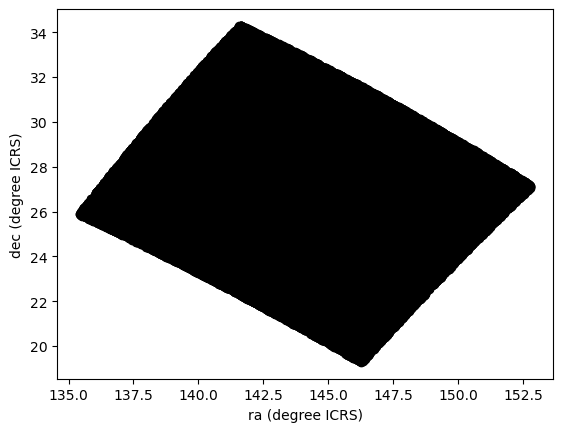

In [11]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'ko')

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

The arguments to `plt.plot` are `x`, `y`, and a string that specifies
the style.  In this case, the letters `ko` indicate that we want a
black, round marker (`k` is for black because `b` is for blue).
The functions `xlabel` and `ylabel` put labels on the axes.

Looking at this plot, we can see that the region we selected, which is
a rectangle in GD-1 coordinates, is a non-rectanglar region in ICRS
coordinates.

However, this scatter plot has a problem.  It is
"[overplotted](https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/)",
which means that there are so many overlapping points, we cannot
distinguish between high and low density areas.

To fix this, we can provide optional arguments to control the size and
transparency of the points.


## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (5 Minutes) </p>

---
In the call to `plt.plot`, use the keyword argument `markersize` to
make the markers smaller.

Then add the keyword argument `alpha` to make the markers partly transparent.

Adjust these arguments until you think the figure shows the data most clearly.

Note: Once you have made these changes, you might notice that the
figure shows stripes with lower density of stars.  These stripes are
caused by the way Gaia scans the sky, which [you can read about
here](https://www.cosmos.esa.int/web/gaia/scanning-law).  The dataset
we are using, [Gaia Data Release
2](https://www.cosmos.esa.int/web/gaia/dr2), covers 22 months of
observations; during this time, some parts of the sky were scanned
more than others.


Text(0, 0.5, 'dec (degree ICRS)')

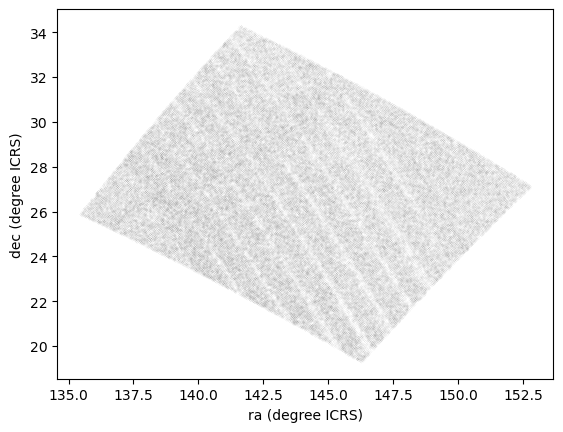

In [12]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

# Transform back

---
Remember that we selected data from a rectangle of coordinates in the
GD-1 frame, then transformed them to ICRS when we
constructed the query.
The coordinates in the query results are in ICRS.

To plot them, we will transform them back to the GD-1 frame;
that way, the axes of the figure are aligned with the orbit of GD-1,
which is useful for two reasons:

- By transforming the coordinates, we can identify stars that are
  likely to be in GD-1 by selecting stars near the centerline of the
  stream, where φ<sub>2</sub> is close to 0.

- By transforming the proper motions, we can identify stars with
  non-zero proper motion along the φ<sub>1</sub> axis, which are likely to be part of GD-1.

To do the transformation, we will put the results into a `SkyCoord`
object.  In a previous episode, we created a `SkyCoord` object like
this:

In [13]:
skycoord = SkyCoord(ra=polygon_results['ra'], dec=polygon_results['dec'])

Notice that we did not specify the reference frame. That is because when
using `ra` and `dec` in `SkyCoord`, the `ICRS` frame is assumed by default.

The `SkyCoord` object can keep track not just of location, but also proper motions.
This means that we can initialize a `SkyCoord` object with location and proper motions,
then use all of these quantities together to transform into the GD-1 frame.

Now we are going to do something similar, but now we will take advantage of the `SkyCoord` object's
capacity to include and track space motion information in addition to `ra` and
`dec`. We will now also include:

- `pmra` and `pmdec`, which are proper motion in the `ICRS` frame, and

- `distance` and `radial_velocity`, which are important for the reflex correction and will be discussed in that section.

In [14]:
import numpy as np

In [15]:
distance = 8 * u.kpc
radial_velocity= 0 * u.km/u.s

skycoord = SkyCoord(ra=polygon_results['ra'], 
                    dec=polygon_results['dec'],
                    pm_ra_cosdec=polygon_results['pmra'],
                    pm_dec=polygon_results['pmdec'], 
                    distance=distance, 
                    radial_velocity=radial_velocity)

For the first four arguments, we use columns from `polygon_results`.

For `distance` and `radial_velocity` we use constants, which we explain in the section on reflex correction.

The result is an Astropy `SkyCoord` object, which we can transform to
the GD-1 frame.

In [16]:
transformed = skycoord.transform_to(gd1_frame)

The result is another `SkyCoord` object, now in the GD-1 frame.

# Reflex Correction

---

The next step is to correct the proper motion measurements for the
effect of the motion of our solar system around the Galactic center.

When we created `skycoord`, we provided constant values for `distance`
and `radial_velocity` rather than measurements from Gaia.

That might seem like a strange thing to do, but here is the motivation:

- Because the stars in GD-1 are so far away, parallaxes measured by Gaia
  are negligible, making the distance estimates unreliable.  
  So we replace them with our current best estimate of the mean distance to
  GD-1, about 8 kpc.  See [Koposov, Rix, and Hogg,
  2010](https://ui.adsabs.harvard.edu/abs/2010ApJ...712..260K/abstract).

- For the other stars in the table, this distance estimate will be
  inaccurate, so reflex correction will not be correct.  But that should
  have only a small effect on our ability to identify stars with the
  proper motion we expect for GD-1.

- The measurement of radial velocity has no effect on the correction
  for proper motion, but we have to provide a value to avoid errors in
  the reflex correction calculation.  So we provide `0` as an arbitrary
  place-keeper.

With this preparation, we can use `reflex_correct` from Gala
([documentation
here](https://gala-astro.readthedocs.io/en/latest/api/gala.coordinates.reflex_correct.html))
to correct for the motion of the solar system.

In [17]:
from gala.coordinates import reflex_correct


skycoord_gd1 = reflex_correct(transformed)

The result is a `SkyCoord` object that contains

- `phi1` and `phi2`, which represent the transformed coordinates in
  the GD-1 frame.

- `pm_phi1_cosphi2` and `pm_phi2`, which represent the transformed proper motions that have been corrected for the motion of the solar system around the Galactic center.

We can select the coordinates and plot them like this:

Text(0, 0.5, 'phi2 (degree GD1)')

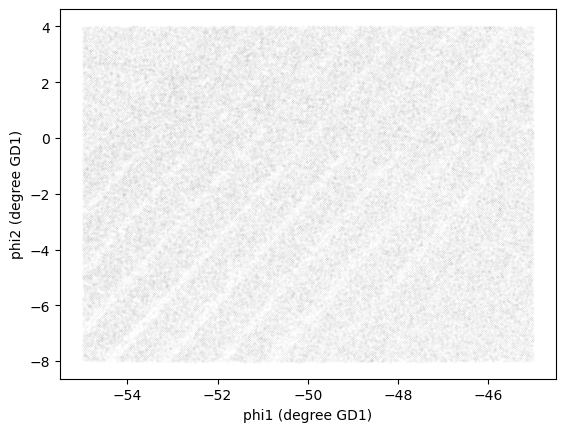

In [18]:
x = skycoord_gd1.phi1
y = skycoord_gd1.phi2
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

We started with a rectangle in the GD-1 frame. When transformed to the ICRS frame, it is a non-rectangular region. Now, transformed back to the GD-1 frame, it is a rectangle again.

# Pandas DataFrame

---
At this point we have two objects containing different sets of the
data relating to identifying stars in GD-1.  `polygon_results` is the Astropy `Table` we downloaded from Gaia.

In [19]:
type(polygon_results)

astropy.table.table.Table

And `skycoord_gd1` is a `SkyCoord` object that contains the
transformed coordinates and proper motions.



In [20]:
type(skycoord_gd1)

astropy.coordinates.sky_coordinate.SkyCoord

On one hand, this division of labor makes sense because each object
provides different capabilities.  But working with multiple object
types can be awkward. It will be more convenient to choose one object and get all of the
data into it.

Now we can extract the columns we want from `skycoord_gd1` and add
them as columns in the Astropy `Table` `polygon_results`.  `phi1` and `phi2` contain the
transformed coordinates.

In [21]:
polygon_results['phi1'] = skycoord_gd1.phi1
polygon_results['phi2'] = skycoord_gd1.phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension       Column
      dec float64      deg                                                        Declination       Column
     pmra float64 mas / yr                         Proper motion in right ascension direction       Column
    pmdec float64 mas / yr                             Proper motion in declination direction       Column
 parallax float64      mas                                                           Parallax       Column
     phi1 float64      deg                                                                          Column
     phi2 float

`pm_phi1_cosphi2` and `pm_phi2` contain the components of proper
motion in the transformed frame.

In [22]:
polygon_results['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
polygon_results['pm_phi2'] = skycoord_gd1.pm_phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension       Column
      dec float64      deg                                                        Declination       Column
     pmra float64 mas / yr                         Proper motion in right ascension direction       Column
    pmdec float64 mas / yr                             Proper motion in declination direction       Column
 parallax float64      mas                                                           Parallax       Column
     phi1 float64      deg                                                                          Column
     phi2 float

## 🔔 **CALLOUT** 
---
If you notice that `SkyCoord` has an attribute called
`proper_motion`, you might wonder why we are not using it.

We could have: `proper_motion` contains the same data as
`pm_phi1_cosphi2` and `pm_phi2`, but in a different format.

## 🔔 **PANDASDataFrameS VERSUS ASTROPYTableS** 
---

Two common choices are the Pandas `DataFrame` and Astropy `Table`.
Pandas `DataFrame`s and Astropy `Table`s share many of the same characteristics
and most of the manipulations that we do can be done with either.  As you become
more familiar with each, you will develop a sense of which one you prefer for
different tasks.  For instance you may choose to use Astropy `Table`s to read
in data, especially astronomy specific data formats, but Pandas `DataFrame`s to
inspect the data. Fortunately, Astropy makes it easy to convert between the
two data types. We will choose to use Pandas `DataFrame`, for two reasons:

1. It provides capabilities that are (almost) a superset of the other data
  structures, so it is the all-in-one solution.

2. Pandas is a general-purpose tool that is useful in many domains,
  especially data science.  If you are going to develop expertise in one
  tool, Pandas is a good choice.

However, compared to an Astropy `Table`, Pandas has one big drawback:
it does not keep the metadata associated with the table, including the
units for the columns.  Nevertheless, we think its a useful data type
to be familiar with.


It is straightforward to convert an Astropy `Table` to a Pandas `DataFrame`.



In [23]:
import pandas as pd

results_df = polygon_results.to_pandas()

`DataFrame` provides `shape`, which shows the number of rows and columns.



In [24]:
results_df.shape

(140339, 10)

It also provides `head`, which displays the first few rows.  `head` is
useful for spot-checking large results as you go along.


In [25]:
results_df.head()

,SOURCE_ID,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
0,637987125186749568,142.483019,21.757716,-2.516838,2.941813,-0.257345,-54.975623,-3.659349,6.429945,6.518157
1,638285195917112960,142.254529,22.476168,2.662702,-12.165984,0.422728,-54.498247,-3.081524,-3.168637,-6.206795
2,638073505568978688,142.645286,22.166932,18.306747,-7.950660,0.103640,-54.551634,-3.554229,9.129447,-16.819570
3,638086386175786752,142.577394,22.227920,0.987786,-2.584105,-0.857327,-54.536457,-3.467966,3.837120,0.526461
4,638049655615392384,142.589136,22.110783,0.244439,-4.941079,0.099625,-54.627448,-3.542738,1.466103,-0.185292


---
## 🔔 **ATTRIBUTES VS FUNCTIONS** 

`shape` is an attribute, so we display its value
without calling it as a function.

`head` is a function, so we need the
parentheses.

---



Before we go any further, we will take all of the steps that we have done
and consolidate them into a single function that we can use to take the
coordinates and proper motion that we get as an Astropy `Table` from our
Gaia query, add columns representing the reflex corrected
GD-1 coordinates and proper motions, and transform it into a
Pandas `DataFrame`.
This is a general function that we will use multiple times as we build different
queries so we want to write it once and then call the function rather than having
to copy and paste the code over and over again.


In [26]:
def make_dataframe(table):
    """Transform coordinates from ICRS to GD-1 frame.

    table: Astropy Table

    returns: Pandas DataFrame
    """
    #Create a SkyCoord object with the coordinates and proper motions
    # in the input table
    skycoord = SkyCoord(
               ra=table['ra'],
               dec=table['dec'],
               pm_ra_cosdec=table['pmra'],
               pm_dec=table['pmdec'],
               distance=8*u.kpc,
               radial_velocity=0*u.km/u.s)

    # Define the GD-1 reference frame
    gd1_frame = GD1Koposov10()

    # Transform input coordinates to the GD-1 reference frame
    transformed = skycoord.transform_to(gd1_frame)

    # Correct GD-1 coordinates for solar system motion around galactic center
    skycoord_gd1 = reflex_correct(transformed)

    #Add GD-1 reference frame columns for coordinates and proper motions
    table['phi1'] = skycoord_gd1.phi1
    table['phi2'] = skycoord_gd1.phi2
    table['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
    table['pm_phi2'] = skycoord_gd1.pm_phi2

    # Create DataFrame
    df = table.to_pandas()

    return df

Here is how we use the function:



In [27]:
results_df = make_dataframe(polygon_results)

# Saving the DataFrame

---

At this point we have run a successful query and combined the results into a single `DataFrame`. This is a good time to save the data.

To save a Pandas `DataFrame`, one option is to convert it to an
Astropy `Table`, like this:


In [28]:
from astropy.table import Table

results_table = Table.from_pandas(results_df)
type(results_table)

astropy.table.table.Table

Then we could write the `Table` to a FITS file, as we did in the
previous lesson.

But, like Astropy, Pandas provides functions to write DataFrames in other formats; to
see what they are [find the functions here that begin with
`to_`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

One of the best options is HDF5, which is Version 5 of [Hierarchical
Data Format](https://en.wikipedia.org/wiki/Hierarchical_Data_Format).

HDF5 is a binary format, so files are small and fast to read and write
(like FITS, but unlike XML).

An HDF5 file is similar to an SQL database in the sense that it can
contain more than one table, although in HDF5 vocabulary, a table is
called a Dataset.  ([Multi-extension FITS
files](https://www.stsci.edu/itt/review/dhb_2011/Intro/intro_ch23.html)
can also contain more than one table.)

And HDF5 stores the metadata associated with the table, including
column names, row labels, and data types (like FITS).

Finally, HDF5 is a cross-language standard, so if you write an HDF5
file with Pandas, you can read it back with many other software tools
(more than FITS).

We can write a Pandas `DataFrame` to an HDF5 file like this:

In [29]:
filename = 'gd1_data.hdf'

results_df.to_hdf(filename, 'results_df', mode='w')

/var/folders/b3/gxd2jb0s4bq1wknd7l1bnpg80000gn/T/ipykernel_15235/1501162109.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  results_df.to_hdf(filename, 'results_df', mode='w')


Because an HDF5 file can contain more than one Dataset, we have to
provide a name, or "key", that identifies the Dataset in the file.

We could use any string as the key, but it is generally a good practice
to use a descriptive name (just like your `DataFrame` variable name) so
we will give the Dataset in the file the same name (key) as the `DataFrame`.

By default, writing a `DataFrame` appends a new dataset to an existing HDF5 file.
We will use the argument `mode='w'` to overwrite the
file if it already exists rather than append another dataset to it.

# Summary

---

In this episode, we re-loaded the Gaia data we saved from a previous query.

We transformed the coordinates and proper motion from ICRS to a frame
aligned with the orbit of GD-1, stored the results in a Pandas
`DataFrame`, and visualized them.

We combined all of these steps into a single function that we can reuse in the future to go straight from the output of a query with object coordinates in the ICRS reference frame directly to a Pandas DataFrame that includes object coordinates in the GD-1 reference frame.

We saved our results to an HDF5 file which we can use to restart the analysis from this stage or verify our results at some future time.

# <p style="background-color: #f5df18; padding: 10px;"> 🗝️ Key points</p>

---

- When you make a scatter plot, adjust the size of the markers and their transparency so the figure is not overplotted; otherwise it can misrepresent the data badly.
- For simple scatter plots in Matplotlib, `plot` is faster than `scatter`.
- An Astropy `Table` and a Pandas `DataFrame` are similar in many ways and they provide many of the same functions.  They have pros and cons, but for many projects, either one would be a reasonable choice.
- To store data from a Pandas `DataFrame`, a good option is an HDF5 file, which can contain multiple Datasets (we'll dig in more in the Join lesson).